# Modelos y Representaciones de Datos

In [ ]:
!git clone https://github.com/JuanCruzC97/ml-stuff.git

In [ ]:
cd ml-stuff/representations

In [32]:
# Librerías para el manejo de los datos.
import pandas as pd
import numpy as np

# Librerías para visualización.
import plotly.express as px
import matplotlib.pyplot as plt

# Funciones propias.
from utils.datasets import make_classification_dataset

# Dataset

In [2]:
train = make_classification_dataset(n_samples=500, noise=0.1, outer_factor=0.5, inner_factor=0.2, random_state=42)
test = make_classification_dataset(n_samples=200, noise=0.1, outer_factor=0.5, inner_factor=0.2, random_state=65)

In [7]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"], 
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

# Models

In [9]:
from sklearn.metrics import accuracy_score
from utils.metrics import display_confusion_matrix

## Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logistic = LogisticRegression(penalty="none", random_state=45)
logistic.fit(X=train[["X1", "X2"]], y=train["y"])

LogisticRegression(penalty='none', random_state=45)

In [12]:
train["y_logistic"] = pd.Series(logistic.predict(train[["X1", "X2"]]), dtype="category")
test["y_logistic"] = pd.Series(logistic.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_logistic"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_logistic"]),2)}')

Train Accuracy: 0.55
Test Accuracy: 0.5


In [13]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_logistic"])

,0 Pred,1 Pred
0 True,141,109
1 True,114,136


In [14]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_logistic",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
k = 5

knn = KNeighborsClassifier(k)
knn.fit(X=train[["X1", "X2"]], y=train["y"])

KNeighborsClassifier()

In [19]:
train["y_knn"] = pd.Series(knn.predict(train[["X1", "X2"]]), dtype="category")
test["y_knn"] = pd.Series(knn.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_knn"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_knn"]),2)}')

Train Accuracy: 0.95
Test Accuracy: 0.9


In [22]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_knn"])

,0 Pred,1 Pred
0 True,233,17
1 True,10,240


In [20]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_knn",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## Tree


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [60]:
max_depth=4
max_leaf_nodes=None

tree = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
tree.fit(X=train[["X1", "X2"]], y=train["y"])

DecisionTreeClassifier(max_depth=4, random_state=42)

In [61]:
train["y_tree"] = pd.Series(tree.predict(train[["X1", "X2"]]), dtype="category")
test["y_tree"] = pd.Series(tree.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_tree"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_tree"]),2)}')

Train Accuracy: 0.94
Test Accuracy: 0.91


In [63]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_tree"])

,0 Pred,1 Pred
0 True,234,16
1 True,14,236


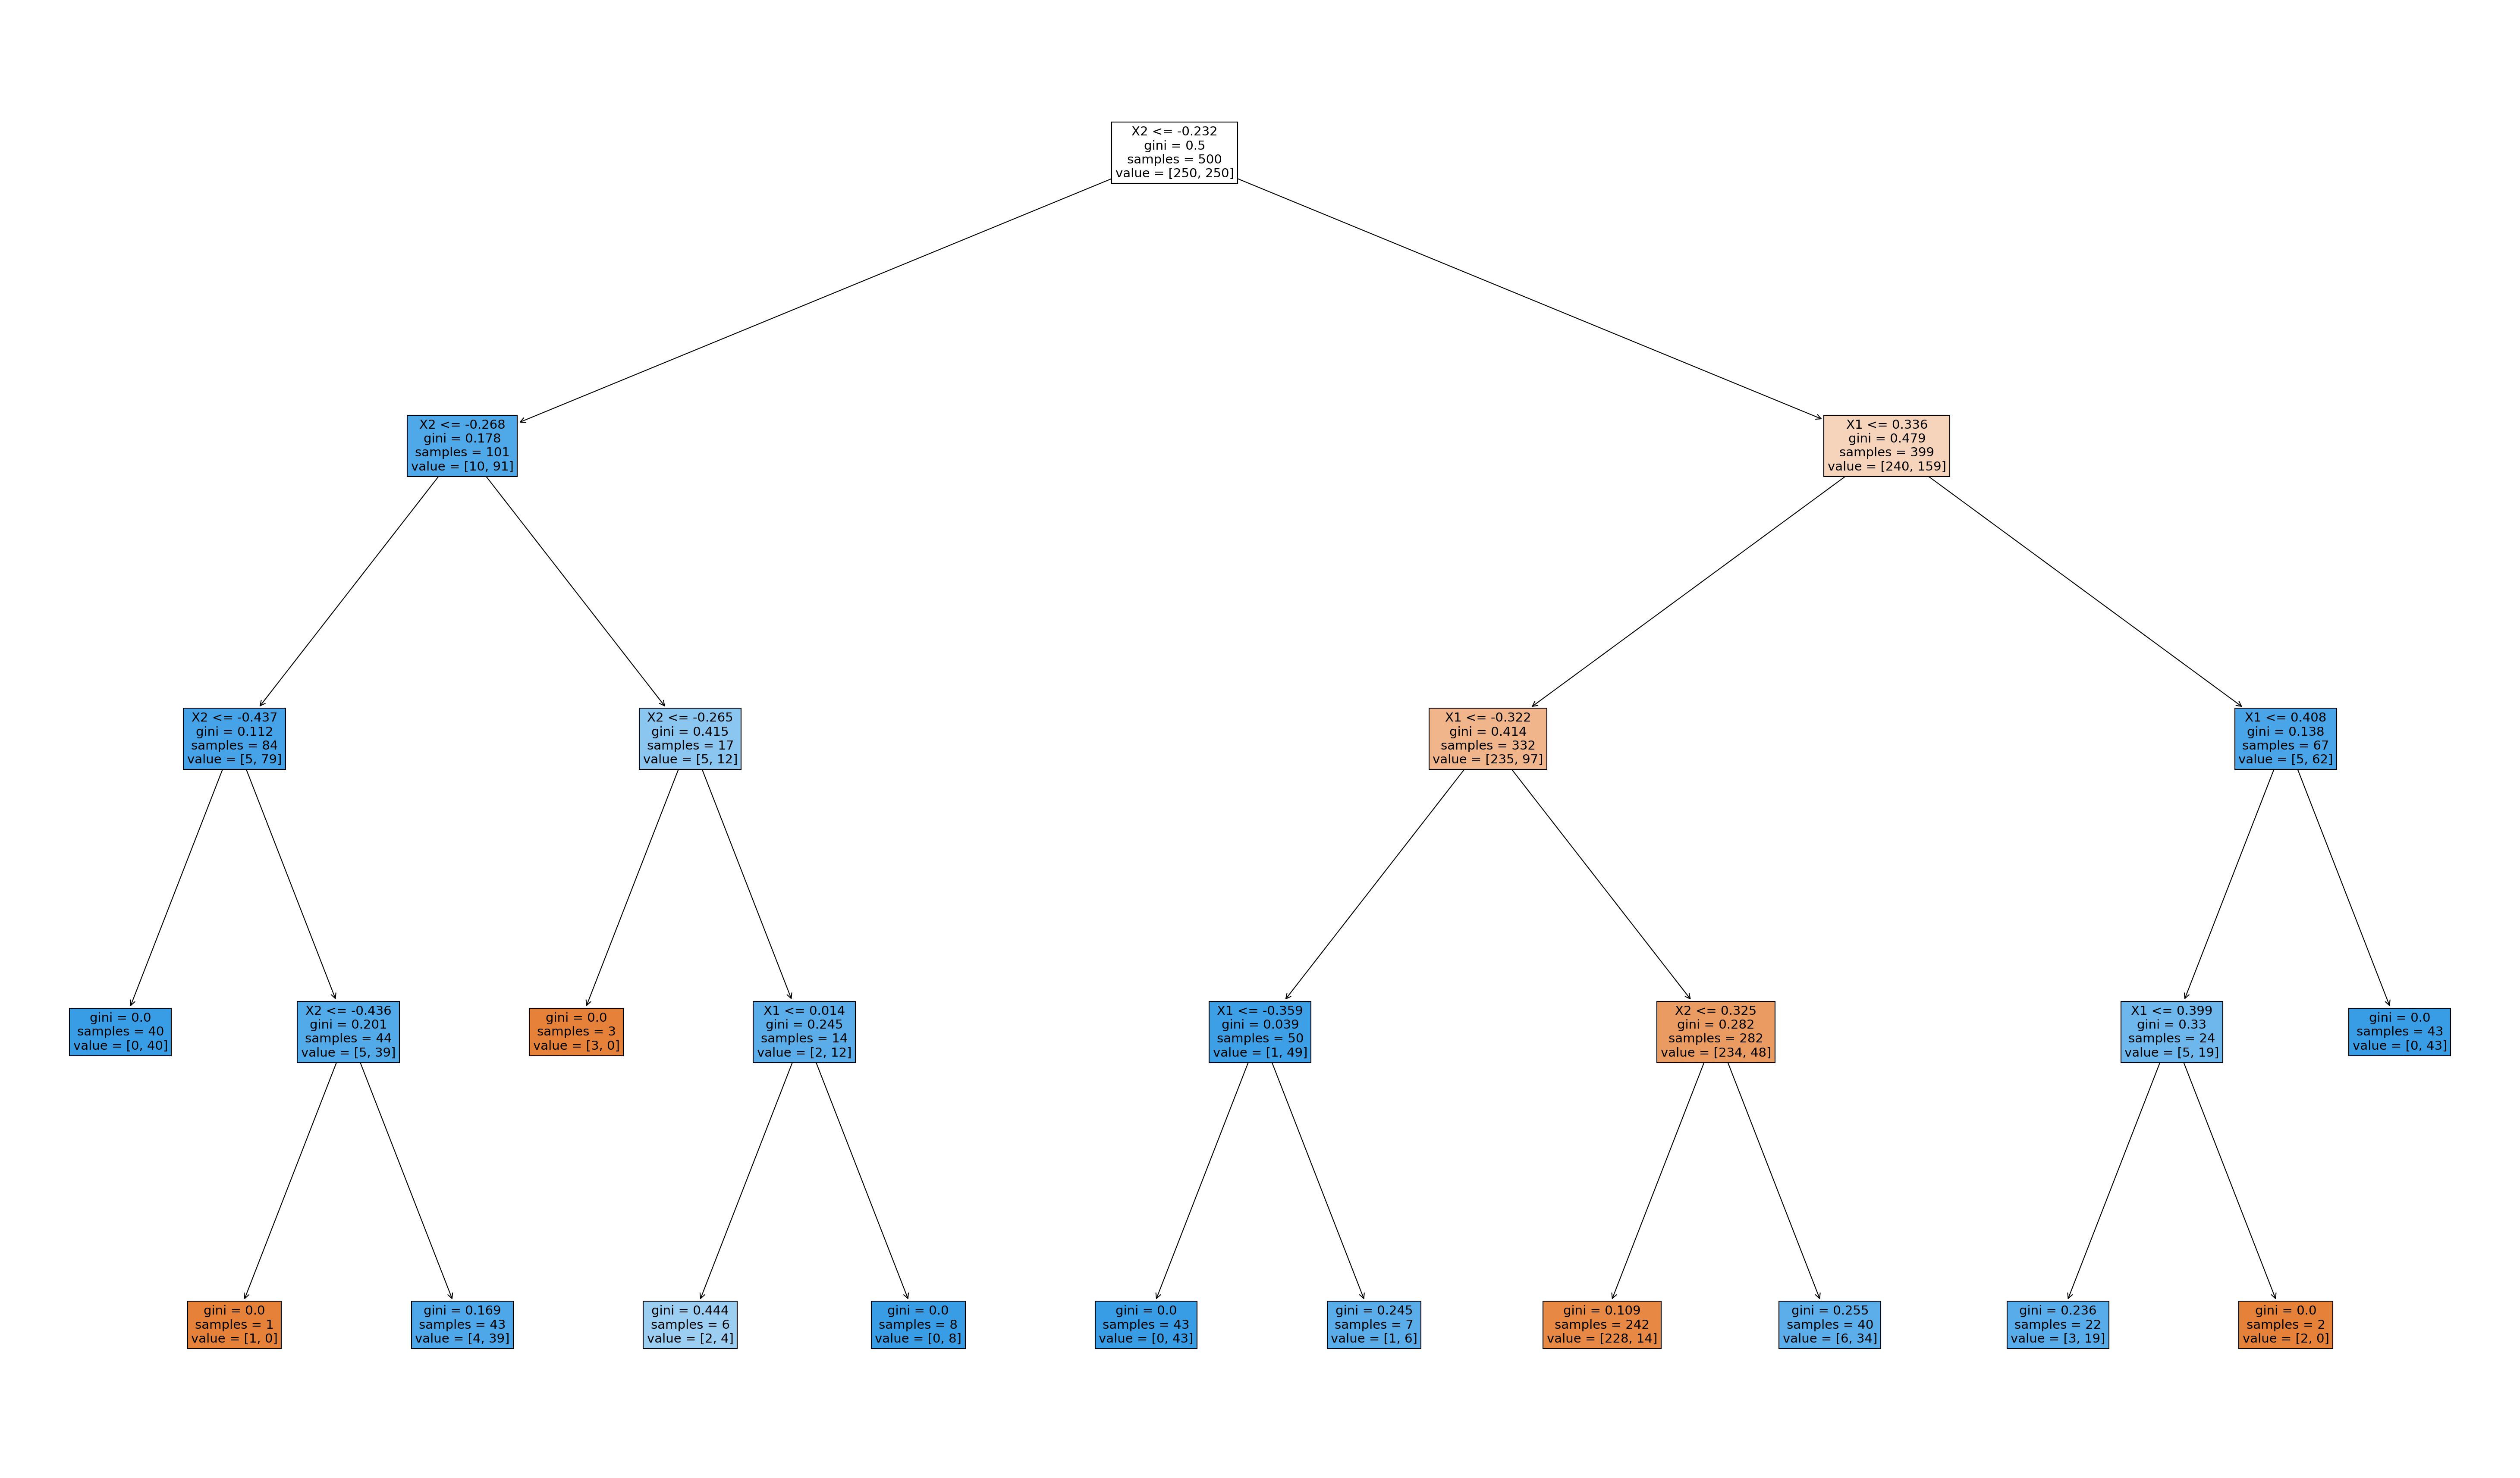

In [64]:
plt.figure(figsize=(50,30), dpi=150)
plot_tree(tree, feature_names=["X1", "X2"], filled=True, fontsize=14)
plt.show()

In [65]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_tree",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## SVC

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [66]:
from sklearn.svm import SVC

In [84]:
c = 1
kernel = 'rbf'
degree = 2

svc = SVC(C=c, kernel=kernel, degree=degree, random_state=42)
svc.fit(X=train[["X1", "X2"]], y=train["y"])

SVC(C=1, degree=2, random_state=42)

In [85]:
train["y_svc"] = pd.Series(svc.predict(train[["X1", "X2"]]), dtype="category")
test["y_svc"] = pd.Series(svc.predict(test[["X1", "X2"]]), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_svc"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_svc"]),2)}')

Train Accuracy: 0.93
Test Accuracy: 0.92


In [86]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_svc"])

,0 Pred,1 Pred
0 True,232,18
1 True,15,235


In [87]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_svc",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")

## Neural Nets

In [88]:
import tensorflow as tf
from tensorflow import keras

In [134]:
LOSS = "binary_crossentropy"
BATCH_SIZE = 20
EPOCHS = 35
LR = 0.1

# Paso 0: Iniciamos los parámetros aleatorios.
tf.random.set_seed(123)
initial_weights = keras.initializers.RandomNormal(0, 0.05, 123)

# Paso 1: Definimos la arquitectura de la red neuronal.
# Para este caso definimos dos capas, una capa de input y una capa de output.
inputs = keras.Input(shape=(2,), name="input")
hidden = keras.layers.Dense(3, activation="sigmoid", kernel_initializer=initial_weights, name="hidden") (inputs)
outputs = keras.layers.Dense(1, activation="sigmoid", kernel_initializer=initial_weights, name="output")(hidden)

# Paso 2: Construimos el modelo uniendo capas.
nn = keras.Model(inputs, outputs)

# Paso 3: Compilamos el modelo eligiendo la función a optimizar y el método de optimización.
nn.compile(optimizer=keras.optimizers.Adam(learning_rate=LR), loss=LOSS, metrics=["accuracy"])

# Paso 4: Entrenamos el modelo.
fit_history = nn.fit(x=train[["X1", "X2"]],
                     y=train["y"],
                     batch_size=BATCH_SIZE,
                     epochs=EPOCHS,
                     verbose=False,
                     shuffle=True)


In [135]:
px.line(data_frame=pd.DataFrame(fit_history.history),
        x=np.arange(0,EPOCHS),
        y="accuracy")

In [136]:
train["y_nn"] = pd.Series(nn.predict(train[["X1", "X2"]], verbose=False).ravel().round(), dtype="category")
test["y_nn"] = pd.Series(nn.predict(test[["X1", "X2"]], verbose=False).ravel().round(), dtype="category")

print(f'Train Accuracy: {round(accuracy_score(y_true=train["y"], y_pred=train["y_nn"]),2)}')
print(f'Test Accuracy: {round(accuracy_score(y_true=test["y"], y_pred=test["y_nn"]),2)}')

Train Accuracy: 0.93
Test Accuracy: 0.91


In [138]:
display_confusion_matrix(y_true=train["y"], y_pred=train["y_nn"])

,0 Pred,1 Pred
0 True,223,27
1 True,7,243


In [137]:
px.scatter(data_frame=train,
           x="X1",
           y="X2",
           color="y_nn",
           symbol="y",
           color_discrete_sequence=["#3d5a80", "#ff6700"],
           symbol_sequence=["circle", "x"],
           height=600,
           width=600,
           template="plotly_white")